# **Umair Ahmad**
# **21i-2081**
# Deep Learning Assignment 1

# Part 1 Data Creation

In [ ]:
#Please uncomment to download and unzip the data in your gdrive(you need to run this only onces)
#!wget "http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar"
#!tar -xvf  '/content/images.tar' -C '/content/drive/MyDrive/ImageNetDogs'

# Importing libraries

In [ ]:
import pandas as pd
import glob
import random
import shutil
import os
from os import path
import matplotlib.pyplot as plt
lst = glob.glob('/content/drive/MyDrive/ImageNetDogs/Images/*')

# Helping Functions

In [ ]:
#helping function
def delete_random_elems(input_list, n):
    to_delete = set(random.sample(range(len(input_list)), n))
    return [x for i,x in enumerate(input_list) if not i in to_delete]

#helping function
def get_sorted_list(path):
  lst = glob.glob(path+'/*')
  folder,classes_len,classes_lst=[],[],[]
  for x in lst:
    paths=glob.glob(x+'/*')
    class_lst=str(x).split('-')
    classes_len.append(len(paths))
    folder.append(paths)
    classes_lst.append(class_lst[-1])
  classes_data= pd.DataFrame({'Path': folder,'Image_count': classes_len,'Classes':classes_lst})
  sorted_data=classes_data.sort_values(by=['Image_count'], ascending=False)
  return sorted_data


#helping function (make sure to change paths according to your requirments)
def generate_dir(data):
  i=1
  if path.exists('/content/drive/MyDrive/NewImageNetDogs') == False:
    os.mkdir('/content/drive/MyDrive/NewImageNetDogs')
  if path.exists('/content/drive/MyDrive/NewImageNetDogs/Images') == False:
    os.mkdir('/content/drive/MyDrive/NewImageNetDogs/Images')
  for index,x in enumerate(data["Path"]):
    des_dir='/content/drive/MyDrive/NewImageNetDogs/Images/'+data['Classes'][index]
    if path.exists(des_dir) == False:
      os.mkdir(des_dir)
      #for y in x:
        #shutil.copy(y,des_dir) #uncomment these two line if you want to copy the updated data in the new drive


# This function receive the path contaning classes folder
# i.e  (/content/drive MyDrive/ImageNetDogs/Images)
# return the sorted dataframe containing  Path of each class and imagecount in it

In [ ]:
# function receive the path contaning classes folder i.e  (/content/drive/MyDrive/ImageNetDogs/Images)
# return the sorted dataframe containing  Path of each class and imagecount in it also create the directory in the gdrive
# output directory: /content/drive/MyDrive/NewImageNetDogs

def data_unbalancing(path):
  folder,updated_classes_len=[],[]
  classes_data=get_sorted_list(path)
  count=max(classes_data["Image_count"])
  for x in classes_data["Path"]:
    if(len(x)>count):
      files=delete_random_elems(x,(len(x)-count))
      folder.append(files)
      updated_classes_len.append(len(files))
    else:
      folder.append(x)
      updated_classes_len.append(len(x))
    count=count-2
  classes_data["Path"]=folder
  classes_data["Updated_count"]=updated_classes_len
  generate_dir(classes_data)
  return classes_data
data=data_unbalancing("/content/drive/MyDrive/ImageNetDogs/Images")
data.to_csv("data.csv")

# Visualization of unblanced created data by 2 image reduction rule

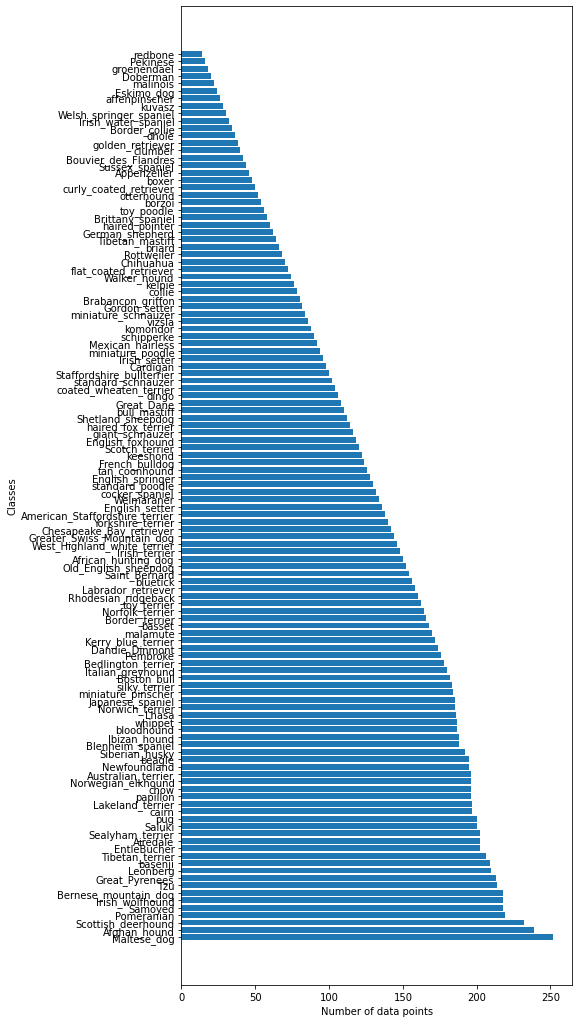

In [ ]:
plt.subplots(figsize=(7,18))
plt.barh(data["Classes"],data["Updated_count"])
plt.xlabel("Number of data points")
plt.ylabel("Classes")  